In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv('trn1.csv')
a.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# data visualisation


In [4]:
def bar_chart(feature):
    survived = a[a['Survived']==1][feature].value_counts()
    dead = a[a['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

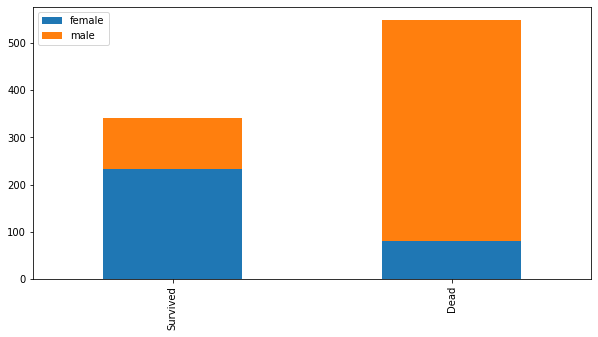

In [5]:
bar_chart('Sex')
#clearly, we can observe that the probability of survivng of a female is much more than a male

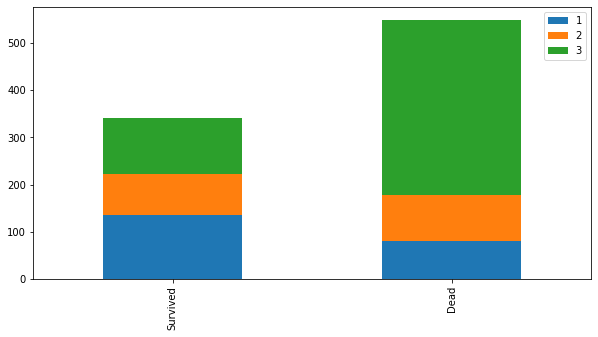

In [6]:
bar_chart('Pclass')
#clearly, Pclass = 1 is more likely to survive and Pclass = 3 is more likely dead.  

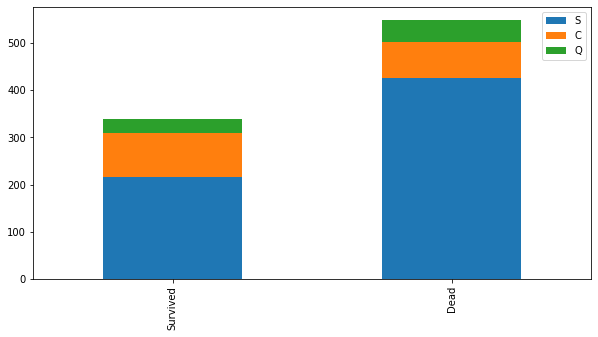

In [7]:
bar_chart('Embarked')
#The Chart confirms a person aboarded from C slightly more likely survived
#The Chart confirms a person aboarded from Q more likely dead
#The Chart confirms a person aboarded from S more likely dead

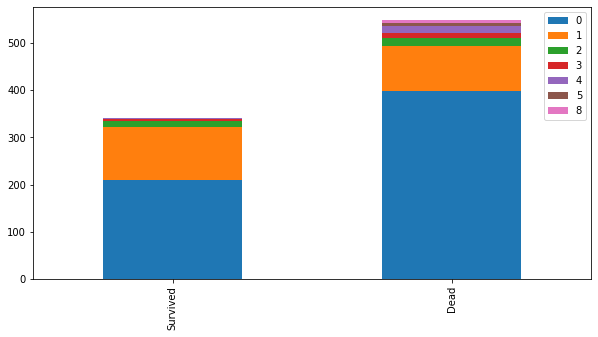

In [8]:
bar_chart('SibSp')

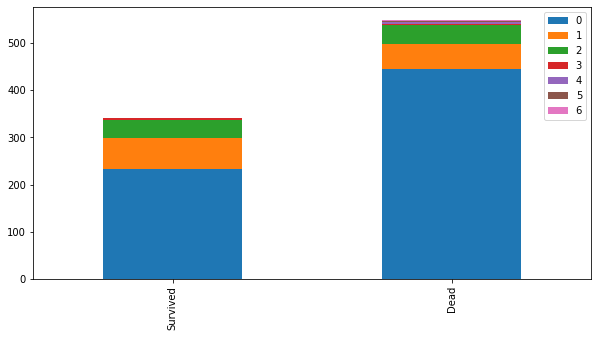

In [9]:
bar_chart('Parch')

# Feature Engineering


In [10]:
# this is the test.csv from kaggle 
b = pd.read_csv('tests.csv')
b.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
a.shape

(891, 12)

In [12]:
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
a.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
dummy = pd.get_dummies(a['Sex'])
dummy
#so, now female = 1 means the person is female and female = 0 means the person is not a female

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [15]:
a = pd.concat([a.drop(['Sex', 'Name', 'Ticket'], axis = 'columns'),dummy], axis = 'columns')
a

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male
0,1,0,3,22.0,1,0,7.2500,NaN,S,0,1
1,2,1,1,38.0,1,0,71.2833,C85,C,1,0
2,3,1,3,26.0,0,0,7.9250,NaN,S,1,0
3,4,1,1,35.0,1,0,53.1000,C123,S,1,0
4,5,0,3,35.0,0,0,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,S,0,1
887,888,1,1,19.0,0,0,30.0000,B42,S,1,0
888,889,0,3,NaN,1,2,23.4500,NaN,S,1,0
889,890,1,1,26.0,0,0,30.0000,C148,C,0,1


In [16]:
a[a['Pclass']==1]['Embarked'].value_counts()
#more than 50% of the datasets have 'S' embarked.

S    127
C     85
Q      2
Name: Embarked, dtype: int64

In [17]:
a[a['Pclass']==2]['Embarked'].value_counts()
# more than 50% of datasets have 'S' embarked

S    164
C     17
Q      3
Name: Embarked, dtype: int64

In [18]:
a[a['Pclass']==3]['Embarked'].value_counts()
#more than 50% of datasets have 'S' embarked
## therefore filling out the missing values with 's'##

S    353
Q     72
C     66
Name: Embarked, dtype: int64

In [19]:
a['Embarked'] = a['Embarked'].fillna('S')


In [20]:
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
female           0
male             0
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
y = LabelEncoder()

In [23]:
a['EMbarked'] = y.fit_transform(a.Embarked)
a = a.drop(['Embarked'], axis = 'columns')
a
#s = 2
#q = 1
#c = 0

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,EMbarked
0,1,0,3,22.0,1,0,7.2500,NaN,0,1,2
1,2,1,1,38.0,1,0,71.2833,C85,1,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,1,0,2
3,4,1,1,35.0,1,0,53.1000,C123,1,0,2
4,5,0,3,35.0,0,0,8.0500,NaN,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,NaN,0,1,2
887,888,1,1,19.0,0,0,30.0000,B42,1,0,2
888,889,0,3,NaN,1,2,23.4500,NaN,1,0,2
889,890,1,1,26.0,0,0,30.0000,C148,0,1,0


# Age:


In [24]:
a['Age'] = a['Age'].fillna(a['Age'].median())
a.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
female           0
male             0
EMbarked         0
dtype: int64

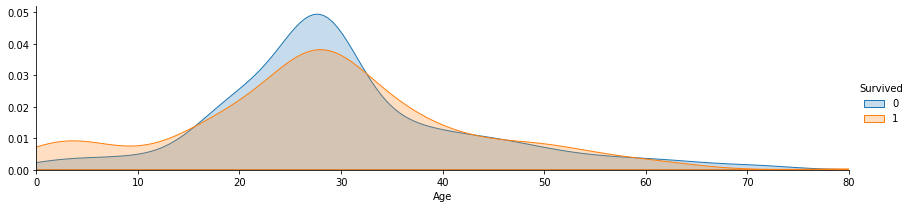

In [25]:
import seaborn as sns
facet = sns.FacetGrid(a, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True) 
facet.set(xlim=(0, a['Age'].max()))
facet.add_legend()
 
plt.show()

In [26]:
def func(age):
    if age > 0 and age<= 16:
        return 1
    else :
        return ((age-6) // 10) +1
    return 0

In [27]:
a['Age'] = a['Age'].apply(lambda x: func(x))
a

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,female,male,EMbarked
0,1,0,3,2.0,1,0,7.2500,NaN,0,1,2
1,2,1,1,4.0,1,0,71.2833,C85,1,0,0
2,3,1,3,3.0,0,0,7.9250,NaN,1,0,2
3,4,1,1,3.0,1,0,53.1000,C123,1,0,2
4,5,0,3,3.0,0,0,8.0500,NaN,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3.0,0,0,13.0000,NaN,0,1,2
887,888,1,1,2.0,0,0,30.0000,B42,1,0,2
888,889,0,3,3.0,1,2,23.4500,NaN,1,0,2
889,890,1,1,3.0,0,0,30.0000,C148,0,1,0


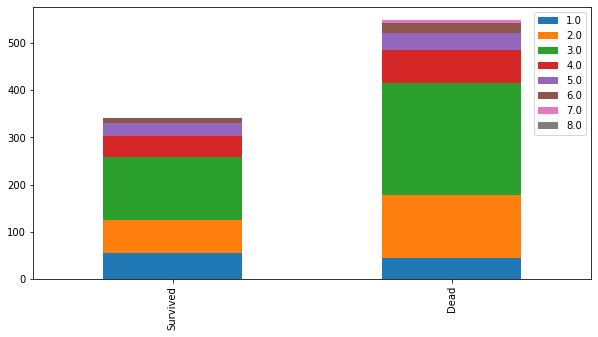

In [28]:
bar_chart('Age')

In [29]:
a = a.drop(['Cabin'], axis = 'columns')
a

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,EMbarked
0,1,0,3,2.0,1,0,7.2500,0,1,2
1,2,1,1,4.0,1,0,71.2833,1,0,0
2,3,1,3,3.0,0,0,7.9250,1,0,2
3,4,1,1,3.0,1,0,53.1000,1,0,2
4,5,0,3,3.0,0,0,8.0500,0,1,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3.0,0,0,13.0000,0,1,2
887,888,1,1,2.0,0,0,30.0000,1,0,2
888,889,0,3,3.0,1,2,23.4500,1,0,2
889,890,1,1,3.0,0,0,30.0000,0,1,0


In [30]:
def fun(fare):
    if fare <= 17:
        return 0
    elif fare >17 and fare < 30:
        return 1
    elif fare>30 and fare<100:
        return 2
    else :
        return 3

In [31]:
a['Fare'] = a['Fare'].apply(lambda x: fun(x))
a

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,EMbarked
0,1,0,3,2.0,1,0,0,0,1,2
1,2,1,1,4.0,1,0,2,1,0,0
2,3,1,3,3.0,0,0,0,1,0,2
3,4,1,1,3.0,1,0,2,1,0,2
4,5,0,3,3.0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,3.0,0,0,0,0,1,2
887,888,1,1,2.0,0,0,3,1,0,2
888,889,0,3,3.0,1,2,1,1,0,2
889,890,1,1,3.0,0,0,3,0,1,0


In [32]:
a.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
female         0
male           0
EMbarked       0
dtype: int64

In [33]:
x = a.drop(['Survived'], axis = 'columns')
y = a.Survived

In [34]:
from sklearn.model_selection import train_test_split

In [51]:
xtr, xts, ytr, yts = train_test_split(x,y, test_size = 0.3)

In [52]:
from sklearn.svm import SVC

In [53]:
model = SVC()

In [54]:
model.fit(xtr, ytr)

SVC()

In [55]:
model.score(xts, yts)

0.6194029850746269

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
model1 = GaussianNB()

In [58]:
model1.fit(xtr,ytr)

GaussianNB()

In [59]:
model.score(xts,yts)

0.6194029850746269

In [60]:
from sklearn import linear_model

In [61]:
reg = linear_model.LinearRegression()

In [62]:
reg.fit(xtr,ytr)

LinearRegression()

In [63]:
reg.score(xts,yts)

0.3774358406642476

In [81]:
from sklearn.ensemble import RandomForestClassifier
models = RandomForestClassifier()

In [82]:
models.fit(xtr, ytr)

RandomForestClassifier()

In [90]:
models.score(xts, yts)

0.7611940298507462

In [68]:
b.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [69]:
b['Age'] = b['Age'].fillna(b['Age'].median())
b.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
b['Fare'] = b['Fare'].fillna(b['Fare'].median())
b.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [71]:
b['Fare'] = b['Fare'].apply(lambda x: fun(x))
b

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,0,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,0,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,0,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,0,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,0,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,0,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,3,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,0,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,0,NaN,S


In [72]:
b = b.drop(['Name', 'Ticket', 'Cabin'], axis = 'columns')
b

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,0,Q
1,893,3,female,47.0,1,0,0,S
2,894,2,male,62.0,0,0,0,Q
3,895,3,male,27.0,0,0,0,S
4,896,3,female,22.0,1,1,0,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,0,S
414,1306,1,female,39.0,0,0,3,C
415,1307,3,male,38.5,0,0,0,S
416,1308,3,male,27.0,0,0,0,S


In [73]:
dmy = pd.get_dummies(b.Sex)

In [75]:
b = pd.concat([b.drop(['Sex'], axis = 'columns'),dmy], axis = 'columns')
b

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,892,3,34.5,0,0,0,Q,0,1
1,893,3,47.0,1,0,0,S,1,0
2,894,2,62.0,0,0,0,Q,0,1
3,895,3,27.0,0,0,0,S,0,1
4,896,3,22.0,1,1,0,S,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,0,S,0,1
414,1306,1,39.0,0,0,3,C,1,0
415,1307,3,38.5,0,0,0,S,0,1
416,1308,3,27.0,0,0,0,S,0,1


In [76]:
b['Age'] = b['Age'].apply(lambda x: func(x))
b

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,892,3,3.0,0,0,0,Q,0,1
1,893,3,5.0,1,0,0,S,1,0
2,894,2,6.0,0,0,0,Q,0,1
3,895,3,3.0,0,0,0,S,0,1
4,896,3,2.0,1,1,0,S,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,3.0,0,0,0,S,0,1
414,1306,1,4.0,0,0,3,C,1,0
415,1307,3,4.0,0,0,0,S,0,1
416,1308,3,3.0,0,0,0,S,0,1


In [78]:
g = LabelEncoder()
b['EMbarked'] = g.fit_transform(b.Embarked)
b = b.drop(['Embarked'], axis = 'columns')
b
#s = 2
#q = 1
#c = 0

,PassengerId,Pclass,Age,SibSp,Parch,Fare,female,male,EMbarked
0,892,3,3.0,0,0,0,0,1,1
1,893,3,5.0,1,0,0,1,0,2
2,894,2,6.0,0,0,0,0,1,1
3,895,3,3.0,0,0,0,0,1,2
4,896,3,2.0,1,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,3.0,0,0,0,0,1,2
414,1306,1,4.0,0,0,3,1,0,0
415,1307,3,4.0,0,0,0,0,1,2
416,1308,3,3.0,0,0,0,0,1,2


In [84]:
Prediction = models.predict(b)
Prediction[0:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [85]:
models.score(xts,yts)

0.7611940298507462

In [88]:
submission = pd.DataFrame({
        "PassengerId": b["PassengerId"],
        "Survived": Prediction
    })

submission.to_csv('submission.csv', index=False)

In [89]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
